In [1]:
import numpy as np
import sklearn
import kmapper as km
import pickle 
import matplotlib.pyplot as plt 
from fput.utils import create_input_data_vector, compute_explained_ratio
# from generate_datasets import make_point_clouds

#for Plotly visualization import:
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go

# %matplotlib inline

In [2]:
# from fput.integrator import FPUT_Integrator

# NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
# T_MAX = 20000   # maximum time of simulation
# INTEGRATION_TIME_STEP = 0.05
# INITIAL_MODE_NUMBER = 1
# NUM_MODES = 3  # number of modes to be observed
# INITIAL_MODE_AMPLITUDE = 10

# fpu = FPUT_Integrator(
#     num_atoms=NUM_ATOMS,
#     num_modes=NUM_MODES,
#     initial_mode_number=1,
#     initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
#     t_step=0.5,
#     t_max=T_MAX/10,
#     alpha=0.0,
#     beta=0.0
# )

# data = fpu.run(method="verlet")

# X = create_input_data_vector(data, sample_manifold=False)
# print(X.shape)

# plt.plot(X[:,0], X[:,32], ".")

In [64]:
# load dataset
with open('output/benettin_data_dict.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)
    
beta_range = np.arange(0.1, 3.0, 0.1, dtype=float)


In [59]:
# pick data for beta
beta = list(data_dict.keys())[10]
print(beta)
tdata = data_dict[beta]

X = create_input_data_vector(tdata, sample_manifold=False)
X.shape

1.1


(1200000, 64)

In [60]:
# point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=20, noise=0.5)
# X = point_clouds_basic

# plt.plot(X[0, :,0], X[0, :,1], ".")

(10, 500, 64)


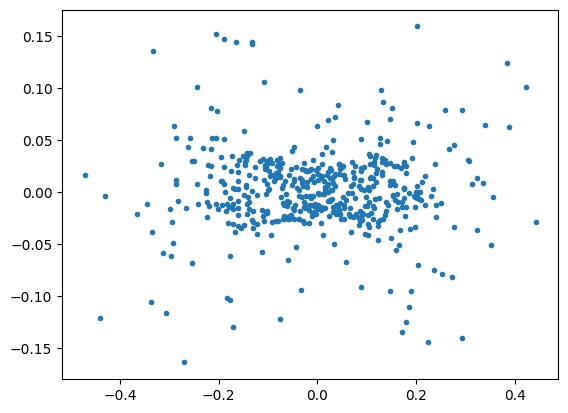

In [61]:
# sample X

X_samples = []
for _ in range(10):
    idxs = np.random.choice(X.shape[0], 500)
    X_samples.append(X[idxs])

X_samples = np.array(X_samples)

print(X_samples.shape)

plt.plot(X_samples[0, :,0], X_samples[0, :,32], ".")

In [62]:
# # get 2d array from sample
# X_sample_ = np.concatenate([X_samples[0, :,0][None], X_samples[0, :,32][None]]).T
# X_sample_.shape

In [63]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

VR = VietorisRipsPersistence(metric="cosine", coeff=2, homology_dimensions=[0, 1, 2])
diagrams = VR.fit_transform(X_samples[0][None])
# diagrams = VR.fit_transform(X_sample_[None])
# diagrams = VR.fit_transform(X[None])
print(diagrams.shape)

plot_diagram(diagrams[0])

(1, 673, 3)


In [33]:
# import gudhi as gd  

# skeleton = gd.RipsComplex(
#     distance_matrix=X_samples[0], 
#     max_edge_length=0.7
# ) 

# Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension=2)
# BarCodes = Rips_simplex_tree.persistence()

In [37]:
# Rips_simplex_tree.persistence_intervals_in_dimension(0)
# # plt.plot(Rips_simplex_tree.persistence_intervals_in_dimension(1))

In [3]:
from tqdm import tqdm

explained_variance_ratio_cumsum_vs_energy = list()

for _, data in tqdm(data_dict.items()):
    X = create_input_data_vector(data, sample_manifold=False)
    explained_variance_ratio = compute_explained_ratio(
        X, pre_whitening=True, verbose=False)

    explained_variance_ratio_cumsum_vs_energy.append(explained_variance_ratio.cumsum())

explained_variance_ratio_cumsum_vs_energy = np.array(explained_variance_ratio_cumsum_vs_energy)

100%|██████████| 29/29 [02:11<00:00,  4.53s/it]
/var/folders/v1/1r3cbng93gg6xsx3ghwzpk9c0000gn/T/ipykernel_1745/2707024249.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  explained_variance_ratio_cumsum_vs_energy = np.array(explained_variance_ratio_cumsum_vs_energy)


Text(0, 0.5, 'cumsum expl.variance ratio')

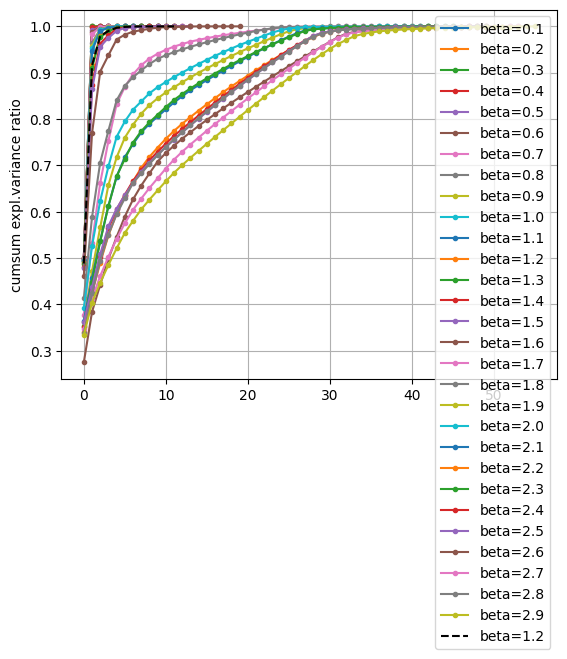

In [52]:
fig, ax = plt.subplots(1, 1)

lim = 100
for x, beta in zip(explained_variance_ratio_cumsum_vs_energy[:lim], beta_range[:lim]):
    ax.plot(x, ".-", label=f"beta={np.round(beta, 2)}")
    

ax.plot(explained_variance_ratio_cumsum_vs_energy[11], "--", label=f"beta={np.round(beta_range[11], 2)}", color='k')

# relabel xaxis
# ax.set_xticks(np.arange(1, 30,10))
    
ax.legend()
# ax.set_xlim(0, 10)
ax.grid()
ax.set_ylabel('cumsum expl.variance ratio')

In [35]:
k = list(data_dict.keys())[11]
print(k)
data = data_dict[k]

1.2000000000000002


In [36]:
# # beta = list(data_dict.keys())[0] # non ergotic
# beta = list(data_dict.keys())[-1] # ergotic
# print("beta=", beta)

# times, q, p, energies = data_dict[beta]

In [37]:
# from fput.integrator import FPUT_Integrator

# fpu = FPUT_Integrator(
#     num_atoms=32,
#     num_modes=3,
#     initial_mode_number=1,
#     initial_mode_amplitude=10,
#     t_step=0.5,
#     t_max=20000,
#     alpha=0.0,
#     beta=0.3
# )

# data = fpu.run(method="verlet")

Explained variance ratio on all data: [0.4464856  0.2591326  0.14514627 0.06103402 0.04586362]


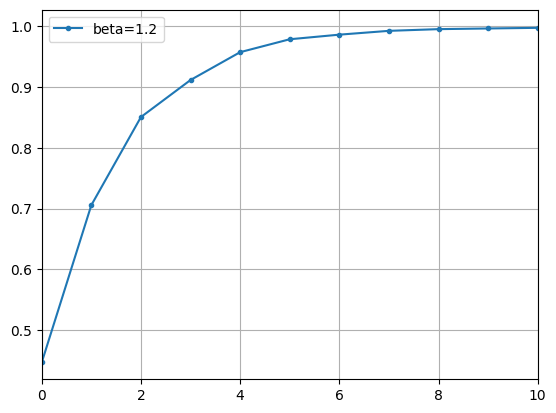

In [38]:
X = create_input_data_vector(data)
explained_variance_ratio = compute_explained_ratio(X, pre_whitening=False)

plt.plot(explained_variance_ratio.cumsum(), ".-", label=f"beta={np.round(k, 2)}")
plt.xlim(0, 10)
plt.grid()
plt.legend()

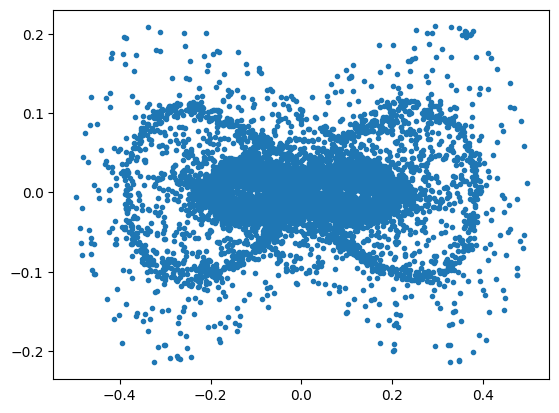

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

_, q, p, energies = data

idxs = np.random.choice(p.shape[1], 10000)

X = np.concatenate([q[:, idxs], p[:, idxs]], axis=0)
X = X[:, :].T

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

plt.plot(X[:, 0], X[:, 32], '.')

In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn import cluster
import umap.umap_ as umap


mapper = km.KeplerMapper(verbose=0)

lens = mapper.fit_transform(X,
    projection=[
        # umap.UMAP(n_components=1, random_state=1),
        TruncatedSVD(n_components=1,
                     random_state=123),
        # PCA(n_components=1)
        ]
            )

# Define the simplicial complex
graph = mapper.map(
    lens,
    X,
    cover=km.Cover(n_cubes=20, perc_overlap=0.4),
    clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2, linkage='single'),
    # clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=20),
    # clusterer=sklearn.cluster.KMeans(n_clusters=2, random_state=123)
    )

# Visualization
mapper.visualize(graph, path_html="output/fpu.html");
plotlyviz(graph, graph_data=False)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(180,180,180)', 'width': 1.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': '2c46430b-8228-49e2-84e2-1aa3b493208f',
              'x': [1.5508296710293925, 1.2105336119985692, None,
                    1.475661099637671, 1.2105336119985692, None,
                    1.2105336119985692, 0.8119465970432276, None,
                    0.9361106926375588, 0.8119465970432276, None,
                    0.8119465970432276, 0.4741673829935299, None,
                    0.8119465970432276, 0.6643950779822676, None,
                    0.24376455692008953, 0.4741673829935299, None,
                    0.4741673829935299, 0.24144464526047066, None,
                    0.24144464526047066, -0.11524791617520266, None,
                    -0.2694739683882304, -0.11524791617520266, None,
                    -0.11524791617520266, -0.25889396275008136, None,
                    -0.11524791617520266, -0.4801801707153426, None,
                    -0.6220535649183062, -0.25889396275008136, None,
                    -0.25889396275008136, 0.0024916486352452374, None,
                    -0.25889396275008136, -0.413208270644576, None,
                    0.0024916486352452374, -0.12620922537825796, None,
                    -0.413208270644576, -0.12620922537825796, None,
                    -0.413208270644576, -0.7594924580815203, None,
                    -0.12620922537825796, -0.042627792095535924, None,
                    -0.7594924580815203, -0.9879941480356794, None,
                    -0.9879941480356794, -1.050143697869526, None,
                    -0.042627792095535924, -0.138177319586627, None,
                    -1.050143697869526, -1.0231655735125411, None,
                    -0.138177319586627, -0.38938911438620133, None,
                    -0.38938911438620133, -0.7294071408100197, None,
                    -1.0231655735125411, -0.7294071408100197, None,
                    -1.0231655735125411, -1.4259481318329152, None,
                    -0.7294071408100197, -0.6069051301060155, None,
                    -0.7294071408100197, -1.0608360074131473, None,
                    -0.6069051301060155, -0.5218053242273816, None,
                    -0.5218053242273816, -0.4229479136931184, None,
                    -0.7866889001712168, -0.4229479136931184, None,
                    -0.4229479136931184, -0.2721704861921527, None,
                    -0.4229479136931184, -0.05532869281975968, None,
                    -0.2721704861921527, -0.3255198105596298, None,
                    -0.2721704861921527, 0.11993339733904579, None,
                    -0.3255198105596298, -0.5376005962605128, None,
                    -0.3255198105596298, 0.015213575118622232, None,
                    -0.5376005962605128, -0.8606863424372133, None,
                    -0.5376005962605128, -0.40281534887606935, None],
              'y': [2.033825437418048, 2.177591589743859, None, 2.45394641689826,
                    2.177591589743859, None, 2.177591589743859, 2.2185023738471386,
                    None, 2.5455700957614282, 2.2185023738471386, None,
                    2.2185023738471386, 2.016579016607244, None,
                    2.2185023738471386, 2.6033556956195723, None,
                    2.3384398603434104, 2.016579016607244, None, 2.016579016607244,
                    1.7088085235613923, None, 1.7088085235613923,
                    1.5167787723065178, None, 1.8268679869315312,
                    1.5167787723065178, None, 1.5167787723065178,
                    1.1451571381042547, None, 1.5167787723065178,
                    1.7376970162733727, None, 1.2894768107470667,
                    1.1451571381042547, None, 1.1451571381042547,
                    0.8505566421576376, None, 1.1451571381042547,
                    0.7817420981039359, None, 0.8505566421576376,
                    0.5046655780559016, None, 0.781742